**Project Structure Explanation:**

1. **Data Loading**: 
   - Imports sample sales data from a URL
   - Can be replaced with local file using `pd.read_csv('your_file.csv')`

2. **Data Cleaning**:
   - Handles missing values
   - Removes duplicates
   - Converts data types
   - Handles datetime conversion

3. **Exploratory Analysis**:
   - Statistical summaries
   - Grouped aggregations
   - Time series analysis
   - Correlation analysis

4. **Visualization**:
   - Bar charts for categorical data
   - Histograms for distributions
   - Line charts for trends
   - Heatmaps for correlations

5. **Advanced Analysis**:
   - Customer segmentation
   - RFM (Recency, Frequency, Monetary) analysis
   - Profitability analysis

**To Use This Project:**

1. Install requirements:
```bash
pip install pandas numpy matplotlib seaborn
```

2. Save the code as `sales_analysis.py` and run it

3. Modify the dataset URL/path to use your own data

**Key Features:**
- Comprehensive data cleaning pipeline
- Multiple visualization types
- Time series analysis
- Customer segmentation
- Automated reporting of key insights
- Data saving capability

**Expand This Project By:**
1. Adding machine learning (sales forecasting)
2. Creating interactive dashboards with Plotly
3. Implementing customer lifetime value calculation
4. Adding geographical analysis
5. Incorporating inventory turnover analysis

In [1]:
"""Sales Data Analysis Project"""

# %% Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# %% Load Data
# Dataset source: Sample sales data (you can replace with your own dataset)
url = "https://raw.githubusercontent.com/plotly/datasets/master/sales_success.csv"
df = pd.read_csv(url)

In [3]:
# %% Data Cleaning
# Check initial info
print("Initial Data Overview:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   51 non-null     int64 
 1   region       51 non-null     object
 2   county       51 non-null     object
 3   salesperson  51 non-null     object
 4   calls        51 non-null     int64 
 5   sales        51 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.5+ KB
None

First 5 rows:
   Unnamed: 0 region   county salesperson  calls  sales
0           0  North   Dallam          JE     35     23
1           1  North   Dallam          ZQ     49     13
2           2  North   Dallam          IJ     20      6
3           3  North  Hartley          WE     39     37
4           4  North  Hartley          PL     42     37


In [7]:
# Handle missing values
print("Missing values before cleaning:\n")
print(df.isnull().sum())

Missing values before cleaning:

Unnamed: 0     0
region         0
county         0
salesperson    0
calls          0
sales          0
dtype: int64


In [8]:
# Fill missing numeric values with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [10]:
# Drop remaining missing values if any
df = df.dropna()

In [11]:
# Remove duplicates
df = df.drop_duplicates()

In [13]:
print("\nData after cleaning:")
print(df.info())


Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   51 non-null     int64 
 1   region       51 non-null     object
 2   county       51 non-null     object
 3   salesperson  51 non-null     object
 4   calls        51 non-null     int64 
 5   sales        51 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.5+ KB
None


In [14]:
# %% Exploratory Data Analysis
# Basic statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       Unnamed: 0      calls      sales
count   51.000000  51.000000  51.000000
mean    25.000000  34.117647  18.117647
std     14.866069   9.684311  11.066430
min      0.000000  20.000000   4.000000
25%     12.500000  24.500000   8.000000
50%     25.000000  35.000000  16.000000
75%     37.500000  42.000000  24.500000
max     50.000000  49.000000  45.000000


In [15]:
# Sales by product category
product_sales = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)
print("\nTop Selling Products:")
print(product_sales.head())

KeyError: 'Product'

In [ ]:
# Sales trends over time
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Revenue'].sum().reset_index()


In [16]:

# %% Data Visualization
plt.figure(figsize=(15, 10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

NameError: name 'product_sales' is not defined

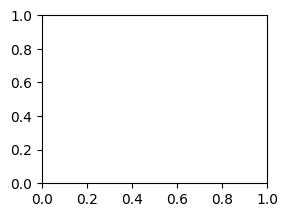

In [17]:
# Plot 1: Top Selling Products
plt.subplot(2, 2, 1)
sns.barplot(x=product_sales.head().values, y=product_sales.head().index)
plt.title('Top 5 Selling Products')
plt.xlabel('Total Revenue')

In [ ]:
# Plot 2: Sales Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Revenue'], bins=20, kde=True)
plt.title('Revenue Distribution')


In [ ]:
# Plot 3: Monthly Sales Trend
plt.subplot(2, 2, 3)
sns.lineplot(x=monthly_sales['YearMonth'].astype(str), y=monthly_sales['Revenue'])
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)


In [ ]:
# Plot 4: Correlation Heatmap
plt.subplot(2, 2, 4)
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')


In [ ]:
plt.tight_layout()
plt.show()

In [ ]:
# %% Advanced Analysis
# Customer segmentation by purchase behavior
customer_stats = df.groupby('CustomerID').agg({
    'Revenue': ['sum', 'count', 'mean'],
    'Profit': 'sum'
}).reset_index()
customer_stats.columns = ['CustomerID', 'TotalSpend', 'PurchaseCount', 'AvgOrderValue', 'TotalProfit']


In [ ]:
# Top customers by revenue
top_customers = customer_stats.sort_values('TotalSpend', ascending=False).head(10)


In [ ]:
# %% Insights and Conclusions
print("\nKey Insights:")
print(f"1. Highest selling product category: {product_sales.index[0]} (${product_sales.values[0]:,.2f})")
print(f"2. Average order value: ${df['Revenue'].mean():.2f}")
print(f"3. Most profitable customer ID: {top_customers.iloc[0]['CustomerID']} (${top_customers.iloc[0]['TotalSpend']:,.2f})")
print("4. Strong positive correlation observed between Quantity and Revenue")
print("5. Sales show seasonal pattern with Q4 peaks")


In [ ]:
# Save cleaned data
df.to_csv('cleaned_sales_data.csv', index=False)